In [385]:
# Modules
import os
import csv

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import random
from scipy.stats import sem
import warnings

In [386]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data


# Set path for file
mouse_data_csvpath = os.path.join("data", "mouse_drug_data.csv")
print(mouse_data_csvpath)
trial_data_csvpath = os.path.join("data", "clinicaltrial_data.csv")
print(trial_data_csvpath)

# Open the CSV
with open(mouse_data_csvpath, newline="") as csvfile:
    mouse_data_csv = csv.reader("data/mouse_drug_data.csv", delimiter=",")
    
with open(trial_data_csvpath, newline="") as csvfile:
    trial_data_csv = csv.reader("data/clinicaltrial_data.csv", delimiter=",")

data/mouse_drug_data.csv
data/clinicaltrial_data.csv


In [387]:
# Display the mouse data table for preview
mouse_data_pd = pd.read_csv(mouse_data)
mouse_data_pd.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [388]:
# Display the trial data table for preview
trial_data_pd = pd.read_csv(trial_data)
trial_data_pd.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [389]:
# Combine the data into a single dataset = Merge two dataframes using an inner join
merged_data_df = pd.merge(mouse_data_pd, trial_data_pd, on="Mouse ID")
merged_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [390]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint (part 1)

# Using GroupBy in order to separate the data into fields according to "Drug" values
drug_grouped_df = merged_data_df.groupby(['Drug','Timepoint'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(drug_grouped_df)

# In order to be visualized, a data function must be used...
drug_grouped_df.count().head()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23

In [391]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint (part 2)
tumor_volume_grouped_mean = drug_grouped_df["Tumor Volume (mm3)"].mean()
tumor_volume_grouped_mean

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
           25           54.287674
           30           56.769517
           35           58.827548
           40           61.467895
           45           64.132421
Infubinol  0            45.000000
           5            47.062001
           10           49.403909
           15           51.296397
           20           53.197691
           25           55.715252
           30           58.299397
           35           60.742461
           40           63.

In [392]:
# Convert to DataFrame and Preview DataFrame
tumor_volume_grouped_mean_df = pd.DataFrame(drug_grouped_df["Tumor Volume (mm3)"].mean())
tumor_volume_grouped_mean_df.head(20)

# Rename Tumor Volume (mm3) to Average Tumor Volume (mm3)
tumor_volume_grouped_mean_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'}, inplace=True)
tumor_volume_grouped_mean_df

Average Tumor Volume (mm3)
Drug      Timepoint                            
Capomulin 0                           45.000000
          5                           44.266086
          10                          43.084291
          15                          42.064317
          20                          40.716325
          25                          39.939528
          30                          38.769339
          35                          37.816839
          40                          36.958001
          45                          36.236114
Ceftamin  0                           45.000000
          5                           46.503051
          10                          48.285125
          15                          50.094055
          20                          52.157049
          25                          54.287674
          30                          56.769517
          35                          58.827548
          40                          61.467895
          45                          64.132421
Infubinol 0                           45.000000
          5                           47.062001
          10                          49.403909
          15                          51.296397
          20                          53.197691
          25                          55.715252
          30                          58.299397
          35                          60.742461
          40                          63.162824
          45                          65.755562
...                                         ...
Ramicane  0                           45.000000
          5                           43.944859
          10                          42.531957
          15                          41.495061
          20                          40.238325
          25                          38.974300
          30                          38.703137
          35                          37.451996
          40                          36.574081
          45                          34.955595
Stelasyn  0                           45.000000
          5                           47.527452
          10                          49.463844
          15                          51.529409
          20                          54.067395
          25                          56.166123
          30                          59.826738
          35                          62.440699
          40                          65.356386
          45                          68.438310
Zoniferol 0                           45.000000
          5                           46.851818
          10                          48.689881
          15                          50.779059
          20                          53.170334
          25                          55.432935
          30                          57.713531
          35                          60.089372
          40                          62.916692
          45                          65.960888

[100 rows x 1 columns]

In [393]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_grouped_sem_df = pd.DataFrame(drug_grouped_df["Tumor Volume (mm3)"].sem())
tumor_volume_grouped_sem_df.head(99)

# Rename Tumor Volume (mm3) to Average Tumor Volume (mm3)
tumor_volume_grouped_sem_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume Standard Error (mm3)'}, inplace=True)
tumor_volume_grouped_sem_df

# Convert and preview to DataFrame
tumor_volume_grouped_sem_df=tumor_volume_grouped_sem_df.reset_index()
tumor_volume_grouped_sem_df.head()

tumor_vols_pivot_sem=tumor_volume_grouped_sem_df.pivot(index = "Timepoint", columns = "Drug", values = "Average Tumor Volume Standard Error (mm3)")
tumor_vols_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [394]:
tumor_vols_sem_reset_index=tumor_volume_grouped_sem_df.pivot(index = "Timepoint", columns = "Drug", values = "Average Tumor Volume Standard Error (mm3)")
tumor_vols_sem_reset_index.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [395]:
# Minor Data Munging to Re-Format the Data Frames
# Set new index to timepoint
# Preview that Reformatting worked

tumor_volume_grouped_mean_df = pd.DataFrame(drug_grouped_df["Tumor Volume (mm3)"].mean())
tumor_volume_grouped_mean_df.reset_index().pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
tumor_volume_grouped_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [396]:
tumor_volume_grouped_mean_df.index

MultiIndex(levels=[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=['Drug', 'Timepoint'])

In [397]:
tumor_volume_reset_index=tumor_volume_grouped_mean_df.reset_index().pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
tumor_volume_reset_index.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


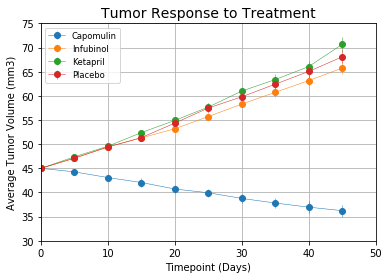

<Figure size 432x288 with 0 Axes>

In [399]:
# Generate the Plot (with Error Bars)

plt.errorbar(tumor_volume_reset_index.index, tumor_volume_reset_index["Capomulin"], yerr=tumor_vols_sem_reset_index['Capomulin'], linewidth=.5, marker="o")
plt.errorbar(tumor_volume_reset_index.index, tumor_volume_reset_index["Infubinol"], yerr=tumor_vols_sem_reset_index['Infubinol'], linewidth=.5, marker="o")
plt.errorbar(tumor_volume_reset_index.index, tumor_volume_reset_index["Ketapril"], yerr=tumor_vols_sem_reset_index['Ketapril'], linewidth=.5, marker="o")
plt.errorbar(tumor_volume_reset_index.index, tumor_volume_reset_index["Placebo"], yerr=tumor_vols_sem_reset_index['Placebo'], linewidth=.5, marker="o")

# Adding plotting parameters
plt.title("Tumor Response to Treatment", fontsize=14)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(0, 50)
plt.ylim(30, 75)

# Adding legend to the plot 
plt.legend(loc="best", fontsize="small", fancybox=True)

# Adding grid
plt.grid()

# Display the Figure
plt.show()

# Save the Figure
plt.savefig("../Pymaceuticals/tumor_response_to_treatment.png")

## Metastatic Response to Treatment

In [400]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites = drug_grouped_df["Metastatic Sites"].mean()
mean_met_sites.head(10)

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
           25           0.818182
           30           1.090909
           35           1.181818
           40           1.380952
           45           1.476190
Name: Metastatic Sites, dtype: float64

In [401]:
# Convert and preview to DataFrame
mean_met_sites_df = pd.DataFrame(mean_met_sites)
mean_met_sites_df.head(20)

# Rename Metastatic Sites to Average Metastatic Sites
mean_met_sites_df.rename(columns={'Metastatic Sites': 'Average Metastatic Sites'}, inplace=True)
mean_met_sites_df

Average Metastatic Sites
Drug      Timepoint                          
Capomulin 0                          0.000000
          5                          0.160000
          10                         0.320000
          15                         0.375000
          20                         0.652174
          25                         0.818182
          30                         1.090909
          35                         1.181818
          40                         1.380952
          45                         1.476190
Ceftamin  0                          0.000000
          5                          0.380952
          10                         0.600000
          15                         0.789474
          20                         1.111111
          25                         1.500000
          30                         1.937500
          35                         2.071429
          40                         2.357143
          45                         2.692308
Infubinol 0                          0.000000
          5                          0.280000
          10                         0.666667
          15                         0.904762
          20                         1.050000
          25                         1.277778
          30                         1.588235
          35                         1.666667
          40                         2.100000
          45                         2.111111
...                                       ...
Ramicane  0                          0.000000
          5                          0.120000
          10                         0.250000
          15                         0.333333
          20                         0.347826
          25                         0.652174
          30                         0.782609
          35                         0.952381
          40                         1.100000
          45                         1.250000
Stelasyn  0                          0.000000
          5                          0.240000
          10                         0.478261
          15                         0.782609
          20                         0.952381
          25                         1.157895
          30                         1.388889
          35                         1.562500
          40                         1.583333
          45                         1.727273
Zoniferol 0                          0.000000
          5                          0.166667
          10                         0.500000
          15                         0.809524
          20                         1.294118
          25                         1.687500
          30                         1.933333
          35                         2.285714
          40                         2.785714
          45                         3.071429

[100 rows x 1 columns]

In [402]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_sites_df=mean_met_sites_df.reset_index()
mean_met_sites_df.head()
mean_met_sites_pivot_df=mean_met_sites_df.pivot(index = "Timepoint", columns = "Drug", values = "Average Metastatic Sites")
mean_met_sites_pivot_df.head()
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [403]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_met_sites_sem_df = pd.DataFrame(drug_grouped_df["Metastatic Sites"].sem())
mean_met_sites_sem_df.head(10)

# Rename Metastatic Sites to Average Metastatic Sites Standard Error
mean_met_sites_sem_df.rename(columns={'Metastatic Sites': 'Average Metastatic Sites Standard Error'}, inplace=True)
mean_met_sites_sem_df

Average Metastatic Sites Standard Error
Drug      Timepoint                                         
Capomulin 0                                         0.000000
          5                                         0.074833
          10                                        0.125433
          15                                        0.132048
          20                                        0.161621
          25                                        0.181818
          30                                        0.172944
          35                                        0.169496
          40                                        0.175610
          45                                        0.202591
Ceftamin  0                                         0.000000
          5                                         0.108588
          10                                        0.152177
          15                                        0.180625
          20                                        0.241034
          25                                        0.258831
          30                                        0.249479
          35                                        0.266526
          40                                        0.289128
          45                                        0.286101
Infubinol 0                                         0.000000
          5                                         0.091652
          10                                        0.159364
          15                                        0.194015
          20                                        0.234801
          25                                        0.265753
          30                                        0.227823
          35                                        0.224733
          40                                        0.314466
          45                                        0.309320
...                                                      ...
Ramicane  0                                         0.000000
          5                                         0.066332
          10                                        0.090289
          15                                        0.115261
          20                                        0.119430
          25                                        0.119430
          30                                        0.139968
          35                                        0.145997
          40                                        0.160591
          45                                        0.190221
Stelasyn  0                                         0.000000
          5                                         0.087178
          10                                        0.123672
          15                                        0.153439
          20                                        0.200905
          25                                        0.219824
          30                                        0.230641
          35                                        0.240983
          40                                        0.312815
          45                                        0.359062
Zoniferol 0                                         0.000000
          5                                         0.077709
          10                                        0.109109
          15                                        0.111677
          20                                        0.166378
          25                                        0.236621
          30                                        0.248168
          35                                        0.285714
          40                                        0.299791
          45                                        0.286400

[100 rows x 1 columns]

In [404]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_sites_sem_df=mean_met_sites_sem_df.reset_index()
mean_met_sites_sem_df.head()
mean_met_sites_sem_pivot_df=mean_met_sites_sem_df.pivot(index = "Timepoint", columns = "Drug", values = "Average Metastatic Sites Standard Error")
mean_met_sites_sem_pivot_df.head()
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


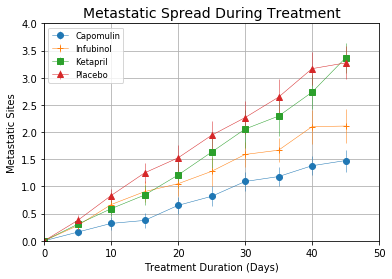

<Figure size 432x288 with 0 Axes>

In [405]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_met_sites_pivot_df.index, mean_met_sites_pivot_df["Capomulin"], yerr=mean_met_sites_sem_pivot_df['Capomulin'], linewidth=.5, marker="o")
plt.errorbar(mean_met_sites_pivot_df.index, mean_met_sites_pivot_df["Infubinol"], yerr=mean_met_sites_sem_pivot_df['Infubinol'], linewidth=.5, marker="+")
plt.errorbar(mean_met_sites_pivot_df.index, mean_met_sites_pivot_df["Ketapril"], yerr=mean_met_sites_sem_pivot_df['Ketapril'], linewidth=.5, marker="s")
plt.errorbar(mean_met_sites_pivot_df.index, mean_met_sites_pivot_df["Placebo"], yerr=mean_met_sites_sem_pivot_df['Placebo'], linewidth=.5, marker="^")

# Adding plotting parameters
plt.title("Metastatic Spread During Treatment", fontsize=14)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.xlim(0, 50)
plt.ylim(0, 4)

# Adding legend to the plot 
plt.legend(loc="best", fontsize="small", fancybox=True)

# Semi-transparent horizontal line
plt.grid()

# Display the Figure
plt.show()

# Save the Figure
plt.savefig("../Pymaceuticals/metastatic_spread_during_treatment.png")

## Survival Rates

In [406]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = drug_grouped_df["Mouse ID"].count()
mouse_count.head(10)

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
           25           22
           30           22
           35           22
           40           21
           45           21
Name: Mouse ID, dtype: int64

In [407]:
# Convert and preview to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df.head(10)

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21

In [408]:
# Rename Mouse ID to Mouse Count
mouse_count_df.rename(columns={'Mouse ID': 'Mouse Count'}, inplace=True)
mouse_count_df.head(10)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21

In [409]:
# Reset Index DataFrame
mouse_count_reset_index_df=mouse_count_df.reset_index()
mouse_count_reset_index_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [410]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
mouse_count_pivot_df=mouse_count_reset_index_df.pivot(index = "Timepoint", columns = "Drug", values = "Mouse Count")
mouse_count_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [411]:
# Generate the Plot (Accounting for percentages)

In [412]:
# New DataFrame on Percent Change in Mouse Count
mouse_survival_df=mouse_count_pivot_df.pct_change()
mouse_survival_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,-0.160000,0.000000,-0.080000,-0.080000,-0.040000,-0.038462,0.000000,-0.038462,-0.040000
10,0.000000,-0.047619,-0.160000,-0.043478,-0.086957,0.000000,-0.080000,-0.040000,-0.080000,-0.083333
15,-0.040000,-0.050000,0.000000,-0.136364,0.000000,-0.166667,-0.260870,0.000000,0.000000,-0.045455
20,-0.041667,-0.052632,-0.047619,0.000000,-0.047619,-0.050000,0.000000,-0.041667,-0.086957,-0.190476
25,-0.043478,0.000000,-0.100000,0.000000,-0.100000,-0.105263,-0.176471,0.000000,-0.095238,-0.058824
30,0.000000,-0.111111,-0.055556,-0.052632,-0.166667,-0.117647,-0.071429,0.000000,-0.052632,-0.062500
35,0.000000,-0.125000,-0.294118,-0.055556,0.000000,-0.066667,-0.230769,-0.086957,-0.111111,-0.066667
40,-0.045455,0.000000,-0.166667,-0.117647,0.000000,-0.142857,-0.100000,-0.047619,-0.250000,0.000000


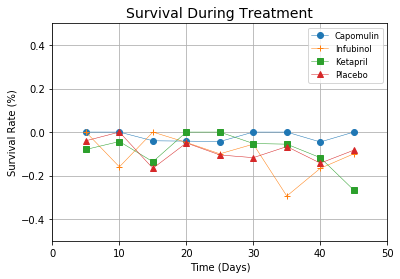

<Figure size 432x288 with 0 Axes>

In [413]:
# Generate the plot
plt.plot(mouse_survival_df.index, mouse_survival_df["Capomulin"], linewidth=.5, marker="o")
plt.plot(mouse_survival_df.index, mouse_survival_df["Infubinol"], linewidth=.5, marker="+")
plt.plot(mouse_survival_df.index, mouse_survival_df["Ketapril"], linewidth=.5, marker="s")
plt.plot(mouse_survival_df.index, mouse_survival_df["Placebo"], linewidth=.5, marker="^")

# Adding plotting parameters
plt.title("Survival During Treatment", fontsize=14)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.xlim(0, 50)
plt.ylim(-0.5, 0.5)

# Adding legend to the plot 
plt.legend(loc="best", fontsize="small", fancybox=True)

# Semi-transparent horizontal line
plt.grid()

# Display the Figure
plt.show()

# Save the Figure
plt.savefig("../Pymaceuticals/survival_during_treatment.png")

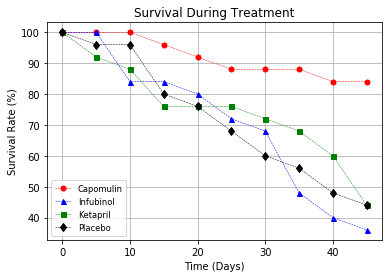

In [12]:
## BELOW IS WHAT PLOT SHOULD LOOK LIKE!##

Summary Bar Graph

In [414]:
# Calculate the percent changes for each drug
# Display the data to confirm

drug_tumor_volume_grouped = merged_data_df.groupby(['Drug', 'Mouse ID', 'Timepoint'])
drug_tumor_volume_grouped.head()
tumor_size_change_df = drug_tumor_volume_grouped["Tumor Volume (mm3)"].pct_change()
tumor_size_change_df.head()

#tumor_size_change_df = pd.DataFrame(tumor_size_change)
#tumor_size_change_df.head()

#mouse_survival_df.pct_change()

#mouse_survival_reset_index_df=mouse_survival_df.reset_index()
#mouse_survival_reset_index_df.head()

# Using GroupBy in order to separate the data into fields according to "Drug" values
#mouse_survival_groupby_df = mouse_survival_df.groupby['Drug']
#mouse_survival_groupby_df.head()

#mouse_survival_change_df = mouse_survival_df["Drug"].pct_change()
#mouse_survival_change_df

0         NaN
1    0.051411
2    0.012488
3    0.017344
4    0.048784
Name: Tumor Volume (mm3), dtype: float64

In [13]:
## OUTPUT SHOULD LOOK LIKE THIS!##

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

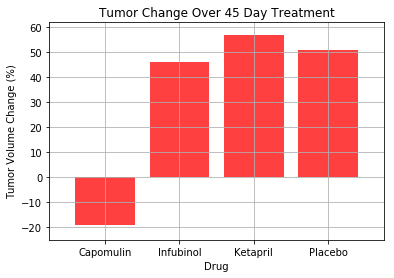

<Figure size 432x288 with 0 Axes>

In [415]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
tumor_volume_change = [-19, 46, 57, 51]
colors = ["green", "red", "red", "red"]

# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("Tumor Volume Change (%)")

plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(-25, max(tumor_volume_change) + 5)

plt.bar(x_axis, tumor_volume_change, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs)

plt.grid()


# Use functions to label the percentages of changes
# Call functions to implement the function calls


# Show the Figure
plt.show()

# Save the Figure
plt.savefig("../Pymaceuticals/tumor_change_45d_treatment.png")

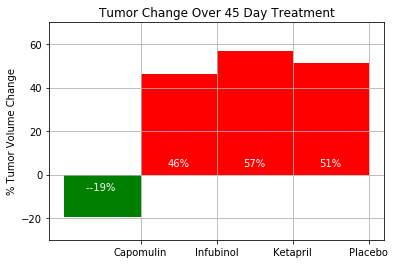

In [14]:
## DON'T ENTER CODE HERE!##